In [1439]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
from datetime import datetime
from IPython.display import Image
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt
%matplotlib inline

In [1440]:
en_con = pd.read_csv ('Energy_consumption_by_source.csv')
en_pro = pd.read_csv ('Energy_production_by_source.csv')
elect = pd.read_csv ('Electricity_net_generation.csv')

In [1441]:
##adding a month column
en_con['date_month'] = en_con['YYYYMM'].astype("str").apply(lambda x: x[-2:]) ##get last 4 char
en_pro['date_month'] = en_pro['YYYYMM'].astype("str").apply(lambda x: x[-2:]) ##get last 4 char
elect['date_month'] = elect['YYYYMM'].astype("str").apply(lambda x: x[-2:]) ##get last 4 char

In [1442]:
# Removing rows where Month = 13
en_con=en_con.drop(en_con[en_con['date_month'] == "13"].index)
en_pro=en_pro.drop(en_pro[en_pro['date_month'] == "13"].index)
elect=elect.drop(elect[elect['date_month'] == "13"].index)

In [1443]:
##subsetting data for 2005 to 2020
year_start_date = 200501
year_end_date = 202012

en_con = en_con[(en_con['YYYYMM'] >= start_date) & (en_con['YYYYMM'] <= end_date)].reset_index()
en_pro = en_pro[(en_pro['YYYYMM'] >= start_date) & (en_pro['YYYYMM'] <= end_date)].reset_index()
elect = elect[(elect['YYYYMM'] >= start_date) & (elect['YYYYMM'] <= end_date)].reset_index()

In [1444]:
##pre-processing en_con
en_con['Value'] = en_con['Value'].astype("float") ##change value type as float
en_con['date_year'] = en_con['YYYYMM'].astype("str").apply(lambda x: x[:4]) ##get first 4 char
en_con_srcdate = en_con.groupby(['Description','date_year'], as_index = False).agg({"Value":"sum"})
print(en_con_srcdate['Description'].unique()) ##finding unique descriptions

['Biomass Energy Consumption' 'Coal Consumption'
 'Geothermal Energy Consumption' 'Hydroelectric Power Consumption'
 'Natural Gas Consumption (Excluding Supplemental Gaseous Fuels)'
 'Nuclear Electric Power Consumption'
 'Petroleum Consumption (Excluding Biofuels)' 'Solar Energy Consumption'
 'Total Fossil Fuels Consumption' 'Total Primary Energy Consumption'
 'Total Renewable Energy Consumption' 'Wind Energy Consumption']


In [1445]:
renewables_con = ['Hydroelectric Power Consumption', 'Geothermal Energy Consumption', 
             'Solar Energy Consumption', 'Wind Energy Consumption', 'Biomass Energy Consumption']

In [1446]:
ren_con_srcdate = en_con_srcdate[en_con_srcdate['Description'].isin(renewables_con)] ##filtering by renewables
print(ren_con_srcdate['Description'].unique())

['Biomass Energy Consumption' 'Geothermal Energy Consumption'
 'Hydroelectric Power Consumption' 'Solar Energy Consumption'
 'Wind Energy Consumption']


In [1447]:
ren_con_srcdate.head()

,Description,date_year,Value
0,Biomass Energy Consumption,2005,3.113930
1,Biomass Energy Consumption,2006,3.262140
2,Biomass Energy Consumption,2007,3.484825
3,Biomass Energy Consumption,2008,3.851392
4,Biomass Energy Consumption,2009,3.940016


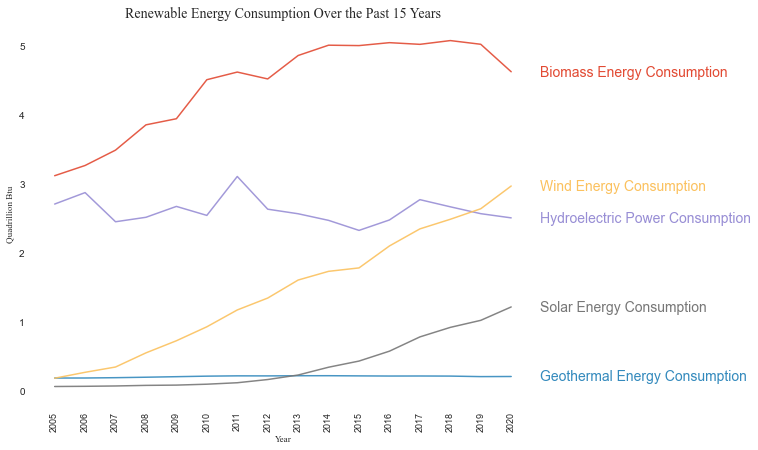

In [1448]:
fig, ax = plt.subplots(figsize=(9,7))   
sns.set_style("white", {'axes.grid' : False})
sns.set_context(rc = {"grid.linewidth": 0.6})

sns.lineplot(data = ren_con_srcdate,
             x = ren_con_srcdate['date_year'], 
             y = ren_con_srcdate['Value'],
             color = 'blue',
             ci = None,
             alpha = 0.9,
             hue = ren_con_srcdate['Description'],
             palette = None,
             ax = ax,
             legend = False)

for line, name in zip(ax.lines, sorted(set(ren_con_srcdate['Description']))):
    y = line.get_ydata()[-1]
    ax.annotate(name, xy=(1,y), xytext=(6,0), color=line.get_color(), 
                xycoords = ax.get_yaxis_transform(), textcoords="offset points",
                size=14, va="center")


plt.xticks(rotation = 90, size = 9)
plt.xlabel('Year', fontfamily = "Times New Roman", size = 9)
plt.ylabel('Quadrillion Btu', fontfamily = "Times New Roman", size = 9)
plt.title("Renewable Energy Consumption Over the Past 15 Years", fontfamily = "Times New Roman", 
        size = 14)

sns.despine(left = True, right = True, top = True, bottom = True)
plt.show()

##plt.legend(loc = 0, ncol = 2, fontsize = 6, labels = None)

In [1449]:
##pre-processing en_pro
en_pro['Value'] = en_pro['Value'].astype("float")
en_pro['date_year'] = en_pro['YYYYMM'].astype("str").apply(lambda x: x[:4])
en_pro_srcdate = en_pro.groupby(['Description','date_year'], as_index = False).agg({"Value":"sum"})

print(en_pro_srcdate['Description'].unique()) ##finding unique description

['Biomass Energy Production' 'Coal Production' 'Crude Oil Production'
 'Geothermal Energy Production' 'Hydroelectric Power Production'
 'Natural Gas (Dry) Production' 'Natural Gas Plant Liquids Production'
 'Nuclear Electric Power Production' 'Solar Energy Production'
 'Total Fossil Fuels Production' 'Total Primary Energy Production'
 'Total Renewable Energy Production' 'Wind Energy Production']


In [1450]:
renewables_pro = ['Hydroelectric Power Production', 'Geothermal Energy Production', 
             'Solar Energy Production', 'Wind Energy Production', 'Biomass Energy Production']

In [1451]:
ren_pro_srcdate = en_pro_srcdate[en_pro_srcdate['Description'].isin(renewables_pro)] ##filtering by renewables
print(ren_pro_srcdate['Description'].unique())

['Biomass Energy Production' 'Geothermal Energy Production'
 'Hydroelectric Power Production' 'Solar Energy Production'
 'Wind Energy Production']


In [1452]:
ren_pro_srcdate.head()

,Description,date_year,Value
0,Biomass Energy Production,2005,3.101186
1,Biomass Energy Production,2006,3.211514
2,Biomass Energy Production,2007,3.472078
3,Biomass Energy Production,2008,3.868251
4,Biomass Energy Production,2009,3.956618


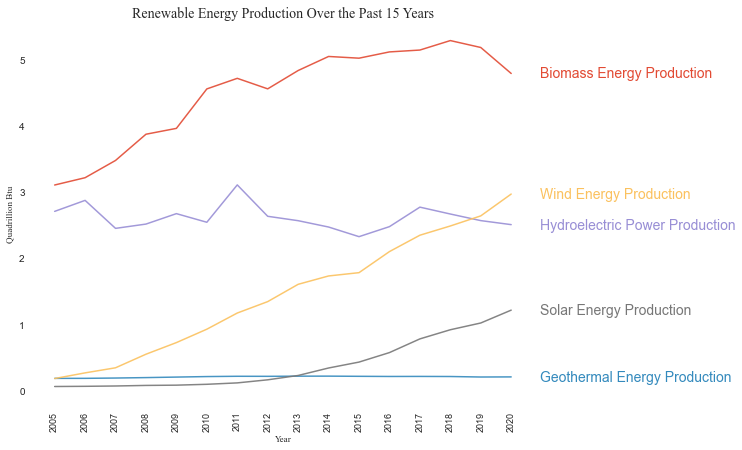

In [1453]:
fig, ax = plt.subplots(figsize=(9,7))   
sns.set_style("white", {'axes.grid' : False})
sns.set_context(rc = {"grid.linewidth": 0.6})

sns.lineplot(data = ren_pro_srcdate,
             x = ren_pro_srcdate['date_year'], 
             y = ren_pro_srcdate['Value'],
             color = 'blue',
             ci = None,
             alpha = 0.9,
             hue = ren_pro_srcdate['Description'],
             palette = None,
             ax = ax,
             legend = False)

for line, name in zip(ax.lines, sorted(set(ren_pro_srcdate['Description']))):
    y = line.get_ydata()[-1]
    ax.annotate(name, xy=(1,y), xytext=(6,0), color=line.get_color(), 
                xycoords = ax.get_yaxis_transform(), textcoords="offset points",
                size=14, va="center")

plt.xticks(rotation = 90, size = 9)
plt.xlabel('Year', fontfamily = "Times New Roman", size = 9)
plt.ylabel('Quadrillion Btu', fontfamily = "Times New Roman", size = 9)
plt.title("Renewable Energy Production Over the Past 15 Years", fontfamily = "Times New Roman", 
        size = 14)

sns.despine(left = True, right = True, top = True, bottom = True)
plt.show()

In [1454]:
##Function to generate a barplot
def barplot(data,x,y, titles, xlab, ylab, hue_by = None, palette = None, leg_labels = None):
  sns.set_style("darkgrid")
  sns.set_context(rc = {"grid.linewidth": 0.6})
  plt.figure(figsize = (9,5))
  b = sns.barplot(x = x, y = y,
              color = "blue", ci = None, alpha = 0.9, hue = hue_by, palette = palette)
  plt.axhline(y.mean(),
              color='green', ls = "--", alpha = 0.5)
  plt.xticks(rotation = 90, size = 9)
  plt.xlabel(xlab, fontfamily = "Times New Roman", size = 9)
  plt.ylabel(ylab, fontfamily = "Times New Roman", size = 9)
  plt.title(titles, fontfamily = "Times New Roman", 
            size = 14)
  sns.despine(left = True, right = True, top = True, bottom = True)
  plt.legend(loc = 0, ncol = 3, fontsize = 6, labels = leg_labels)
  return b

In [1455]:
##Function to generate a line plot
def lineplot(data,x,y, titles, xlab, ylab,hue_by = None, palette = None, 
             leg_labels = None, leg_loc = 0, 
             leg_cols = 2):
  sns.set_style("darkgrid")
  sns.set_context(rc = {"grid.linewidth": 0.6})
  plt.figure(figsize = (9,7))
  g = sns.lineplot(x = x, y = y,
              color = "blue", ci = None, alpha = 0.9, hue = hue_by, palette = palette)
  plt.axhline(y.mean(),
              color='green', ls = "--", alpha = 0.5)
  plt.xticks(rotation = 90, size = 9)
  plt.xlabel(xlab, fontfamily = "Times New Roman", size = 9)
  plt.ylabel(ylab, fontfamily = "Times New Roman", size = 9)
  plt.title(titles, fontfamily = "Times New Roman", 
            size = 14)
  sns.despine(left = True, right = True, top = True, bottom = True)
  plt.legend(loc = leg_loc, ncol = leg_cols, fontsize = 6, labels = leg_labels)
  return g

In [1456]:
elect.head()

,index,MSN,YYYYMM,Value,Column_Order,Description,Unit,date_month
0,440,CLETPUS,200501,177013.907,1,"Electricity Net Generation From Coal, All Sectors",Million Kilowatthours,01
1,441,CLETPUS,200502,155818.014,1,"Electricity Net Generation From Coal, All Sectors",Million Kilowatthours,02
2,442,CLETPUS,200503,163612.7,1,"Electricity Net Generation From Coal, All Sectors",Million Kilowatthours,03
3,443,CLETPUS,200504,143083.239,1,"Electricity Net Generation From Coal, All Sectors",Million Kilowatthours,04
4,444,CLETPUS,200505,153957.962,1,"Electricity Net Generation From Coal, All Sectors",Million Kilowatthours,05


In [1457]:
##pre-processing elect
elect['Value'] = elect['Value'].astype("float") ##change value type as float
elect['date_year'] = elect['YYYYMM'].astype("str").apply(lambda x: x[:4]) ##get first 4 char
elect_srcdate = elect.groupby(['Description','date_year'], as_index = False).agg({"Value":"sum"})

In [1458]:
renewables_elect = ['Electricity Net Generation From Conventional Hydroelectric Power, All Sectors',
                  'Electricity Net Generation From Geothermal, All Sectors',
                  'Electricity Net Generation From Solar, All Sectors',
                  'Electricity Net Generation From Waste, All Sectors',
                  'Electricity Net Generation From Wind, All Sectors',
                  'Electricity Net Generation From Wood, All Sectors']

In [1459]:
ren_filtered = elect_srcdate[elect_srcdate['Description'].isin(renewables_elect)]

In [1460]:
elect_srcdate = ren_filtered.groupby('date_year')['Value'].sum().reset_index()\
.assign(Description='Total Renewable Net Generation').append(elect_srcdate, ignore_index=True)
##assigning renewable energy total to elect_srcdate

In [1461]:
print(elect_srcdate['Description'].unique()) ##finding unique descriptions

['Total Renewable Net Generation'
 'Electricity Net Generation From Coal, All Sectors'
 'Electricity Net Generation From Conventional Hydroelectric Power, All Sectors'
 'Electricity Net Generation From Geothermal, All Sectors'
 'Electricity Net Generation From Hydroelectric Pumped Storage, All Sectors'
 'Electricity Net Generation From Natural Gas, All Sectors'
 'Electricity Net Generation From Nuclear Electric Power, All Sectors'
 'Electricity Net Generation From Other Gases, All Sectors'
 'Electricity Net Generation From Petroleum, All Sectors'
 'Electricity Net Generation From Solar, All Sectors'
 'Electricity Net Generation From Waste, All Sectors'
 'Electricity Net Generation From Wind, All Sectors'
 'Electricity Net Generation From Wood, All Sectors'
 'Electricity Net Generation Total (including from sources not shown), All Sectors']


In [1462]:
total_elect = ['Total Renewable Net Generation',
               'Electricity Net Generation From Coal, All Sectors',
               'Electricity Net Generation From Petroleum, All Sectors',
               'Electricity Net Generation From Natural Gas, All Sectors',
               'Electricity Net Generation From Nuclear Electric Power, All Sectors']

In [1463]:
total_srcdate = elect_srcdate[elect_srcdate['Description'].isin(total_elect)] ##filtering by renewables
print(total_srcdate['Description'].unique())

['Total Renewable Net Generation'
 'Electricity Net Generation From Coal, All Sectors'
 'Electricity Net Generation From Natural Gas, All Sectors'
 'Electricity Net Generation From Nuclear Electric Power, All Sectors'
 'Electricity Net Generation From Petroleum, All Sectors']


In [1464]:
total_srcdate.head()

,date_year,Value,Description
0,2005,357650.654,Total Renewable Net Generation
1,2006,385771.904,Total Renewable Net Generation
2,2007,352747.487,Total Renewable Net Generation
3,2008,380932.389,Total Renewable Net Generation
4,2009,417723.800,Total Renewable Net Generation


No handles with labels found to put in legend.


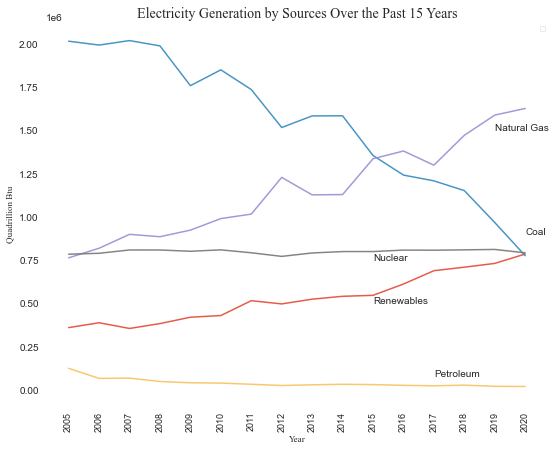

In [1469]:
fig, ax = plt.subplots(figsize=(9,7))   
sns.set_style("white", {'axes.grid' : False})
sns.set_context(rc = {"grid.linewidth": 0.6})

sns.lineplot(data = total_srcdate,
             x = total_srcdate['date_year'], 
             y = total_srcdate['Value'],
             color = 'blue',
             ci = None,
             alpha = 0.9,
             palette = None,
             hue = total_srcdate["Description"],
             ax = ax,
            legend=False)

ax.annotate(text='Petroleum', xy=(12, 80000), xycoords='data')
ax.annotate(text='Renewables', xy=(10, 500000), xycoords='data')
ax.annotate(text='Nuclear', xy=(10, 750000), xycoords='data')
ax.annotate(text='Coal', xy=(15, 900000), xycoords='data')
ax.annotate(text='Natural Gas', xy=(14, 1500000), xycoords='data')

plt.xticks(rotation = 90, size = 9)
plt.xlabel('Year', fontfamily = "Times New Roman", size = 9)
plt.ylabel('Quadrillion Btu', fontfamily = "Times New Roman", size = 9)
plt.title("Electricity Generation by Sources Over the Past 15 Years", fontfamily = "Times New Roman", 
        size = 14)

sns.despine(left = True, right = True, top = True, bottom = True)
plt.legend(loc = 0, ncol = 2, fontsize = 6, labels = None)
plt.show()

In [1466]:
renewables_elect = renewables_elect = ['Electricity Net Generation From Conventional Hydroelectric Power, All Sectors',
                  'Electricity Net Generation From Solar, All Sectors',
                  'Electricity Net Generation From Waste, All Sectors',
                  'Electricity Net Generation From Wind, All Sectors',
                  'Electricity Net Generation From Wood, All Sectors']
relect_srcdate = elect_srcdate[elect_srcdate['Description'].isin(renewables_elect)] ##filtering by renewables
print(relect_srcdate['Description'].unique())

['Electricity Net Generation From Conventional Hydroelectric Power, All Sectors'
 'Electricity Net Generation From Solar, All Sectors'
 'Electricity Net Generation From Waste, All Sectors'
 'Electricity Net Generation From Wind, All Sectors'
 'Electricity Net Generation From Wood, All Sectors']


In [1467]:
relect_srcdate.head()

,date_year,Value,Description
32,2005,270321.257,Electricity Net Generation From Conventional H...
33,2006,289246.416,Electricity Net Generation From Conventional H...
34,2007,247509.975,Electricity Net Generation From Conventional H...
35,2008,254831.383,Electricity Net Generation From Conventional H...
36,2009,273445.095,Electricity Net Generation From Conventional H...


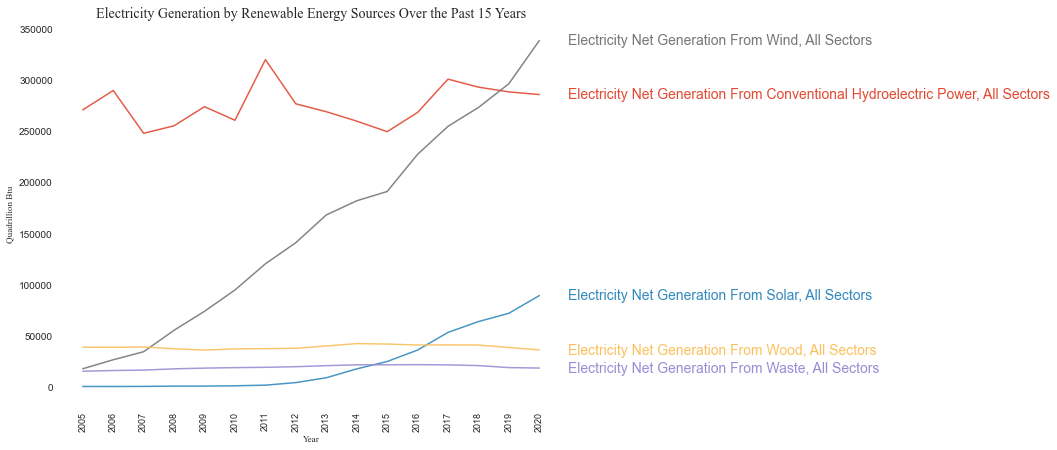

In [1468]:
fig, ax = plt.subplots(figsize=(9,7))   
sns.set_style("white", {'axes.grid' : False})
sns.set_context(rc = {"grid.linewidth": 0.6})

sns.lineplot(data = relect_srcdate,
             x = relect_srcdate['date_year'], 
             y = relect_srcdate['Value'],
             color = 'blue',
             ci = None,
             alpha = 0.9,
             hue = relect_srcdate['Description'],
             palette = None,
             ax = ax,
             legend = False)

for line, name in zip(ax.lines, sorted(set(relect_srcdate['Description']))):
    y = line.get_ydata()[-1]
    ax.annotate(name, xy=(1,y), xytext=(6,0), color=line.get_color(), 
                xycoords = ax.get_yaxis_transform(), textcoords="offset points",
                size=14, va="center")

plt.xticks(rotation = 90, size = 9)
plt.xlabel('Year', fontfamily = "Times New Roman", size = 9)
plt.ylabel('Quadrillion Btu', fontfamily = "Times New Roman", size = 9)
plt.title("Electricity Generation by Renewable Energy Sources Over the Past 15 Years", fontfamily = "Times New Roman", 
        size = 14)

sns.despine(left = True, right = True, top = True, bottom = True)
plt.show()